#  Lab 4 -  LSTM for Text Classification

### 1. Getting the Dataset

In [0]:
import keras
import numpy as np

Using TensorFlow backend.


Load only the top 10000 words in the vocabulary. Reserve index 0 for padding, 1 represents the beginning of the sentence and 2 for unknown words in the vocabulary

In [0]:
VOCAB_SIZE = 10000
INDEX_FROM = 2
imdb = keras.datasets.imdb

In [0]:
word_index = imdb.get_word_index()
word_index = {k:(v+INDEX_FROM) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 

1646592/1641221 [==============================] - 1s 1us/step


In [0]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,index_from=INDEX_FROM)

17465344/17464789 [==============================] - 2s 0us/step


Sanity check:

In [0]:
# Each instance in the training data is a list of word indices representing the words in the review
print('Sample review:', train_data[0])
# and each label is 1 if that review is positive, else 0
print('\nSample label:', test_labels[1])


Sample review: [1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]

Sample label: 1


### 2. Readying the Inputs for the LSTM

In [0]:
from keras.preprocessing.sequence import pad_sequences

MAXIMUM_LENGTH = 500
preprocessed_train_data = pad_sequences(train_data,padding='pre',maxlen=500,value=word_index["<PAD>"])
preprocessed_test_data = pad_sequences(test_data,padding='pre',maxlen=500,value=word_index["<PAD>"])

Sanity check:

In [0]:
print('Length of sample train_data before preprocessing:', len(train_data[0]))
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]))

Length of sample train_data before preprocessing: 218
Length of sample train_data after preprocessing: 500


### 3.Building the Model

In [0]:
# first layer = randomly initialized embedding layer
#second layer LSTM with 100 units and a linear activation
#last layer = output layer. sigmoid activation layer used
# Compile model: binary_crossentropy, adam optimizer, metrics as accuracy

from keras.models import Model
from keras.layers import Embedding, LSTM, Dense, Input

EMBED_SIZE = 100

main_input = Input(shape=(500,), name='input_1')
layer1= Embedding(input_dim=10000,output_dim=EMBED_SIZE, name='Embedding_Layer')(main_input)
layer2 = LSTM(100, name='LSTM_Layer')(layer1)
output = Dense(1, activation = "sigmoid", name='Output_Layer')(layer2) #chose sigmoid for binary classification
model = Model(inputs=main_input, outputs=output)

model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
Embedding_Layer (Embedding)  (None, 500, 100)          1000000   
_________________________________________________________________
LSTM_Layer (LSTM)            (None, 100)               80400     
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


Visualise the model Structure:

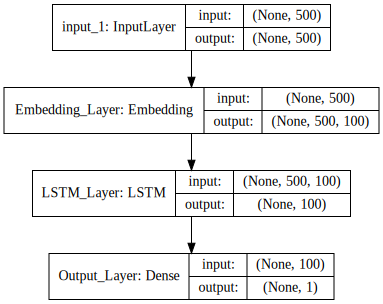

In [0]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import vis_utils

SVG(vis_utils.model_to_dot(model,show_shapes=True, show_layer_names=True).create(prog='dot',format='svg'))

### 4. Training the Model

Split the training data. 2000 samples for validation and the rest for training.

In [0]:
X_val = np.array(preprocessed_train_data[:2000])
partial_X_train = np.array(preprocessed_train_data[2000:])

y_val = np.array(train_labels[:2000])
partial_y_train = np.array(train_labels[2000:])


Train the model for 3 epochs with a batch size of 100

In [0]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs =3,
                    batch_size=100,
                    validation_data=(X_val, y_val),
                    verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 213s 9ms/step - loss: 0.4466 - acc: 0.7871 - val_loss: 0.4671 - val_acc: 0.7855
Epoch 2/3
23000/23000 [==============================] - 213s 9ms/step - loss: 0.2750 - acc: 0.8926 - val_loss: 0.2856 - val_acc: 0.8770
Epoch 3/3
23000/23000 [==============================] - 212s 9ms/step - loss: 0.2346 - acc: 0.9122 - val_loss: 0.3268 - val_acc: 0.8640


Plotting the accuracy graph

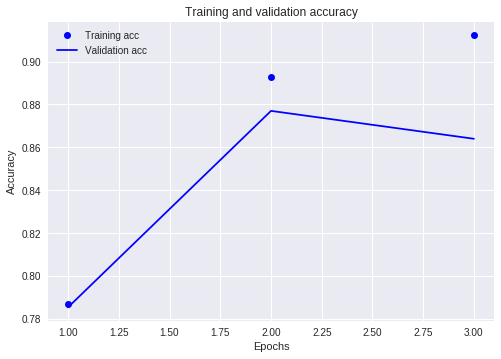

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 5. Evaluating the Model on the Test Data

Evaluate model on the preprocessed test data

In [0]:
results = model.evaluate(preprocessed_test_data, test_labels)

25000/25000 [==============================] - 289s 12ms/step


Print test loss and accuracy:

In [0]:
print('test_loss:', results[0], 'test_accuracy:', results[1])

test_loss: 0.36441236006736755 test_accuracy: 0.84856


### 6.Extracting the Word Embeddings

In [29]:
word_embeddings = model.get_layer('Embedding_Layer').get_weights()[0]
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
Embedding_Layer (Embedding)  (None, 500, 100)          1000000   
_________________________________________________________________
LSTM_Layer (LSTM)            (None, 100)               80400     
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


Sanity check:

In [0]:
print('Shape of word_embeddings:', word_embeddings.shape)

Shape of word_embeddings: (10000, 100)


### 7.Visualizing the Reviews

In [0]:
word2idx = imdb.get_word_index()
# 9998 since we only used top 1000 words of including ‘<PAD>’, ‘<START>’ and ‘<UNK>’
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998} #  CHANGED FROM 10000
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2

Create the idx2word map for all the words in the dataset.

In [0]:
idx2word = dict([[v,k] for k,v in word2idx.items()])

Print a sample review:

In [0]:
print(' '.join(idx2word[idx] for idx in train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

Print the corresponding data:

In [0]:
print(train_data[0])

[1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]


### 8. Visualize the Word_Embeddings

Sanity Check:

In [0]:
from pandas import DataFrame
print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

                 0         1         2         3         4         5   \
woods      0.023891 -0.033328  0.056818 -0.017864  0.018733  0.069648   
hanging   -0.004242  0.016902  0.105863 -0.005219 -0.027245  0.019277   
woody      0.008206 -0.011261  0.052254  0.018639  0.046168 -0.017623   
arranged   0.002237  0.021823  0.004986  0.024425 -0.038462  0.045456   
bringing   0.012357 -0.044936 -0.049333 -0.025650  0.020918 -0.033120   
wooden     0.001727  0.041865 -0.021892 -0.038511 -0.038243 -0.008286   
errors    -0.020409  0.025121  0.023217 -0.035841 -0.035708 -0.017172   
dialogs   -0.053756 -0.010449  0.048045  0.021831 -0.002319 -0.009103   
kids      -0.042141 -0.015900 -0.043051  0.024940  0.046205  0.040478   
uplifting  0.015041  0.020739  0.057832 -0.029009 -0.035153  0.039553   

                 6         7         8         9     ...           90  \
woods     -0.001314 -0.029372 -0.035982 -0.038499    ...    -0.011297   
hanging    0.085241 -0.033429 -0.040140 -0.046959 

Plot the word embeddings using TSNE

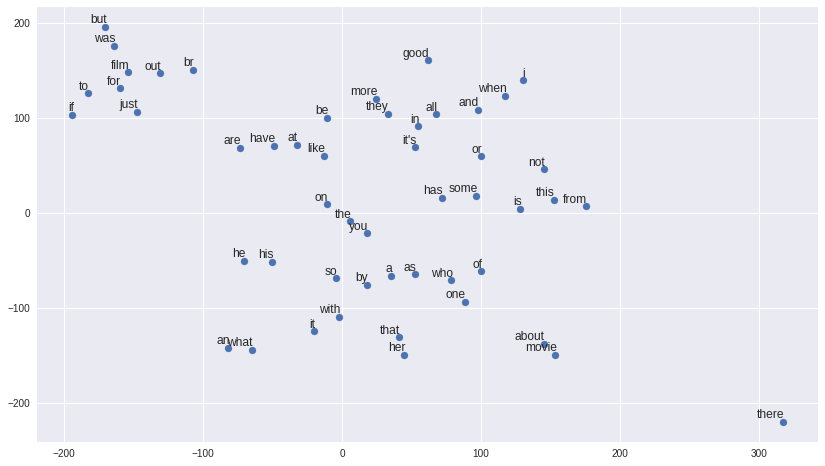

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)

# starting from the first word
start = 3
plot_only = 54
T = tsne.fit_transform(word_embeddings[start:plot_only, :])
labels = [idx2word[i] for i in range(start, plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points',ha='right',va='bottom')